In [1]:
import numpy as np
from numpy import random
import math
from matplotlib import pyplot as plt

# Johnson-Lindenstrauss Lemma

The Johnson-Lindenstrauss Lemma describes the existence of a map from a higher dimensional space $\mathbb{R}^d$ into a lower dimensional space $\mathbb{R}^k$ that preserves pairwise distances between the $n$ points up to an error tolerance $0<\varepsilon<1$, with $k$ on the order of $\varepsilon^{-2}\log n$. 

In applications with which we are concerned, the data (collection of points) can be viewed as a matrix $A\in \mathcal{M}_{m\times n}(\mathbb{R})$, with each row representing a point in $\mathbb{R}^n$, and the map in question may be taken to be a projection $P\in \mathcal{M}_{n\times k}(\mathbb{R})$.

#### Lemma (Johnson-Lindenstrauss)

Let $\{x_1,...,x_n\}$ be a collection of data points in $\mathbb{R}^d$. Let $k\in\mathbb{N}$ such that 
$$
k > C\cdot \log n \quad\quad \left(C= \frac{24}{3\varepsilon^2 - 2\varepsilon^3}\right)\,.
$$
Then there exists a linear map $f$ (projection) such that for any $x_i,x_j\in X$,
$$
(1-\varepsilon)\,\|x_i-x_j\|_2^2 \leq \|f(x_i)-f(x_j)\|_2^2 \leq (1+\varepsilon)\,\|x_i-x_j\|_2^2\,.
$$

We will not provide the full proof here, but part of a proof involves the following lemma:

Let $u\in \mathbb{R}^d$ be fixed, and let $R$ be a random matrix with $R_{ij} \sim N(0,1)$. Define $v=\frac{1}{\sqrt{k}}Ru$, such that $v\in\mathbb{R}^k$. Then
$$
\mathbb{E} \,[\|v\|_2^2] = \|u\|_2^2\,.
$$

Another key observation is the idea that the results will concentrate about the mean, or in practice that the standard deviation from this mean will be reasonable

We provide intuition through an example:

In [2]:
d = 1000
k = 10

In [3]:
u = random.randn(d,1)
u = u / np.linalg.norm(u)

In [4]:
# number of samples we will generate
iterations = 10000

In [5]:
v_errors = np.empty(iterations)

In [6]:
for i in range(iterations):
    # construct random Gaussian matrix
    R = random.randn(k,d)
    v = 1/math.sqrt(k) * R @ u
    # store squared 2-norm of v
    v_errors[i] = np.sum(np.square(v)) - 1



In [7]:
print(f'Mean: {np.mean(v_errors)}')

Mean: 0.0016255539842868778


In [8]:
print(f'Stdev: {np.std(v_errors)}')

Stdev: 0.4567970644127044


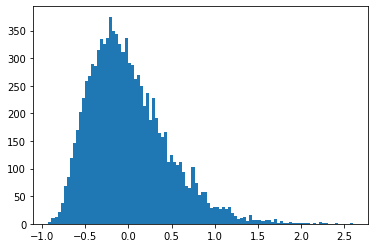

In [9]:
_ = plt.hist(v_errors,bins=100)

In the histogram above, we see that the mean is of $\|v\|_2^2 - \|u\|_2^2$ is $0.000255 \approx 0$, and the standard deviation $0.449$ is fairly reasonable. Thus, we derive two conclusions: that maps exist which preserve the the norms of $u$ (in practice, the pairwise distances in a larger matrix) very precisely, and also that any given random map will perform 'reasonably' at this task.